In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv("C:/Users/Testbook/Downloads/archive (3)/spam.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

## DATA CLEANING ##

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

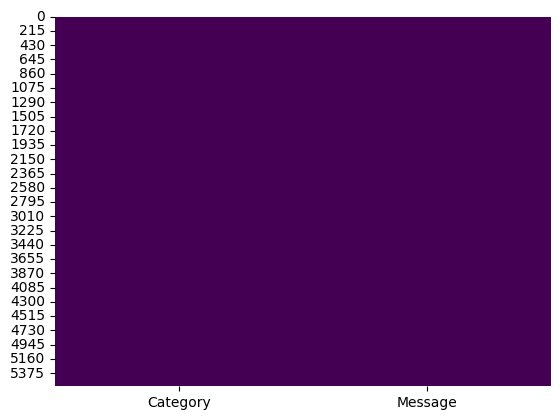

In [9]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.show()
#The entire heatmap is uniformly dark purple, indicating that there are no missing values (NaN) in either the "Category" or "Message" columns of your dataset.

**Explore Data Analysis**

In [10]:
df['Category'].value_counts()


Category
ham     4825
spam     747
Name: count, dtype: int64

In [11]:
df['Category'].value_counts()/len (df)*100


Category
ham     86.593683
spam    13.406317
Name: count, dtype: float64

<BarContainer object of 2 artists>

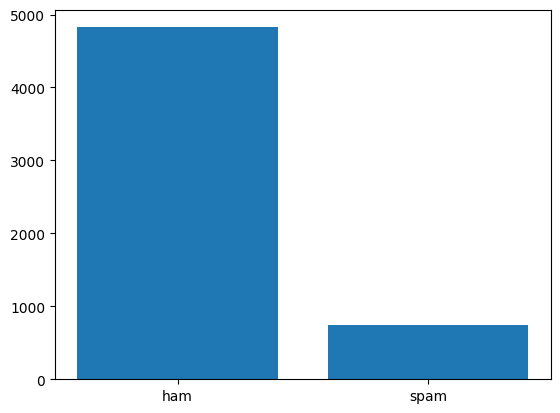

In [12]:
plt.bar(['ham','spam'],df['Category'].value_counts())


<Axes: ylabel='count'>

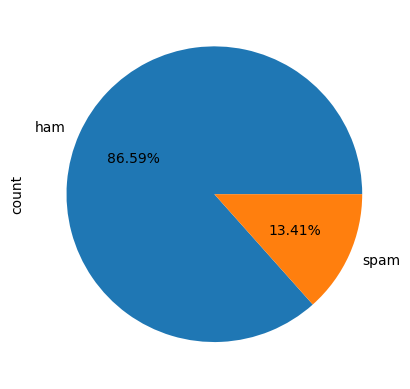

In [13]:
df['Category'].value_counts().plot(kind='pie',autopct='%0.2f%%')


In [14]:
df['Message']


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

**DATA PREPROCESSING**

In [15]:
df.duplicated(subset='Message').sum()


415

In [16]:
df.drop_duplicates(keep = 'first', inplace=True)

In [17]:
df.duplicated(subset='Message').sum()


0

In [18]:
!pip install wordcloud

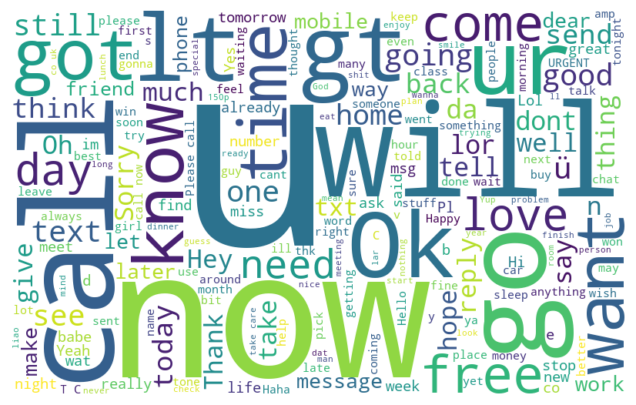

In [20]:
text=' '.join(df['Message'])
wordcloud=WordCloud(width=800,height=500,background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

transformed_text = transform_text("I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today")

print(transformed_text)


gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Testbook\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
df['transformed_text'] = df['Message'].apply(transform_text)

In [23]:
df.head()

,Category,Message,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [ ]:
**DATA ENCODING**

In [24]:
df['Category'] = df['Category'].replace({'ham': 0, 'spam': 1})


In [25]:
df['Category'].value_counts()


Category
0    4516
1     641
Name: count, dtype: int64

In [26]:
df.head()

,Category,Message,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [29]:
spam_corpus = []
for msg in df[df['Category']==1]['transformed_text'].tolist():
   for word in msg.split():
       spam_corpus.append(word)

In [30]:
len(spam_corpus)

9781

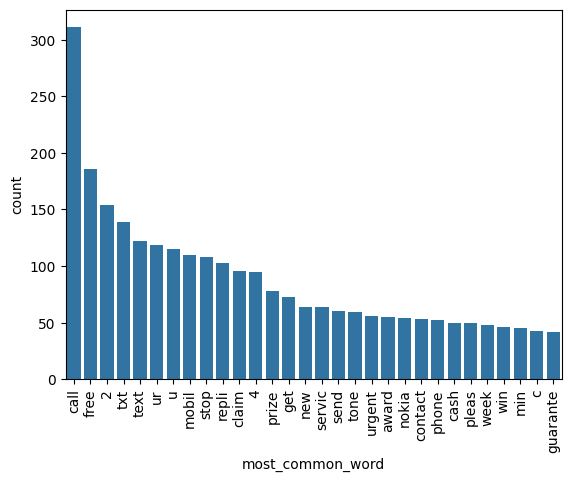

In [31]:
from collections import Counter
import pandas as pd

# Assuming df is your existing DataFrame and spam_corpus is a list of words
word_counts = Counter(spam_corpus).most_common(30)
most_common_words, counts = zip(*word_counts)

# Convert the results into a DataFrame
word_count_df = pd.DataFrame({
    'most_common_word': most_common_words,
    'count': counts
})

# Merge this new DataFrame with your existing one
df = pd.concat([df, word_count_df], axis=1)

# Now you can visualize the most common words using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='most_common_word', y='count', data=word_count_df)
plt.xticks(rotation='vertical')
plt.show()


In [32]:
ham_corpus = []
for msg in df[df['Category']==0]['transformed_text'].tolist():
   for word in msg.split():
       ham_corpus.append(word)

In [33]:
len(ham_corpus)

35940

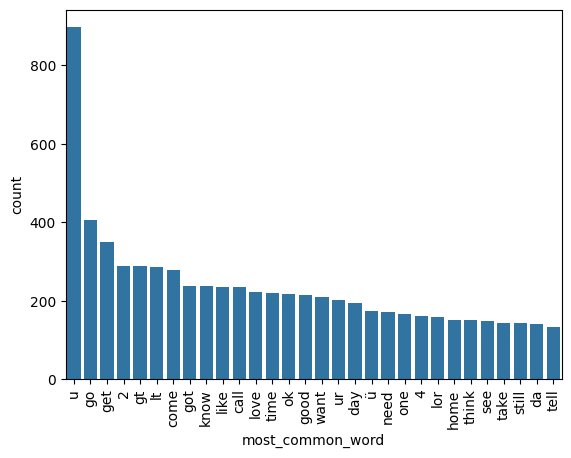

In [34]:
from collections import Counter
import pandas as pd

# Assuming df is your existing DataFrame and spam_corpus is a list of words
word_counts = Counter(ham_corpus).most_common(30)
most_common_words, counts = zip(*word_counts)

# Convert the results into a DataFrame
word_count_df = pd.DataFrame({
    'most_common_word': most_common_words,
    'count': counts
})

# Merge this new DataFrame with your existing one
df = pd.concat([df, word_count_df], axis=1)

# Now you can visualize the most common words using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='most_common_word', y='count', data=word_count_df)
plt.xticks(rotation='vertical')
plt.show()


**MACHINE LEARNING**

In [35]:
df.head()

,Category,Message,transformed_text,most_common_word,count,most_common_word,count
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,call,311.0,u,897.0
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,free,186.0,go,407.0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,2,154.0,get,351.0
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,txt,139.0,2,288.0
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,text,122.0,gt,288.0


In [37]:
X=df['transformed_text']
y=df['Category']

In [38]:
X_train1,X_test1,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
bc = BaggingClassifier(n_estimators=50, random_state=42)
etc = ExtraTreesClassifier(n_estimators=50, random_state=42)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgb = XGBClassifier(n_estimators=50, random_state=42)
svc = SVC(kernel="sigmoid", gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=10)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
abc = AdaBoostClassifier(n_estimators=50, random_state=42)
models = {
    'BGC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb,
    'SVC': svc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc
}

def train_classifier(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [41]:
accuracy_scores = []
precision_scores = []

# Iterate over the items in the clfs dictionary
for name, model in models.items():
    current_accuracy, current_precision = train_classifier(model, X_train, y_train, X_test, y_test)
    rounded_accuracy = round(current_accuracy, 2)
    rounded_precision = round(current_precision, 2)
    
    print()
    print("For: ", name)
    print("Accuracy: ", rounded_accuracy)
    print("Precision: ", rounded_precision)

    accuracy_scores.append(rounded_accuracy)
    precision_scores.append(rounded_precision)


For:  BGC
Accuracy:  0.96
Precision:  0.87

For:  ETC
Accuracy:  0.97
Precision:  0.96

For:  GBDT
Accuracy:  0.96
Precision:  0.95

For:  xgb
Accuracy:  0.97
Precision:  0.96

For:  SVC
Accuracy:  0.98
Precision:  0.95

For:  NB
Accuracy:  0.96
Precision:  1.0

For:  DT
Accuracy:  0.95
Precision:  0.86

For:  LR
Accuracy:  0.95
Precision:  0.88

For:  RF
Accuracy:  0.98
Precision:  0.97

For:  Adaboost
Accuracy:  0.97
Precision:  0.92


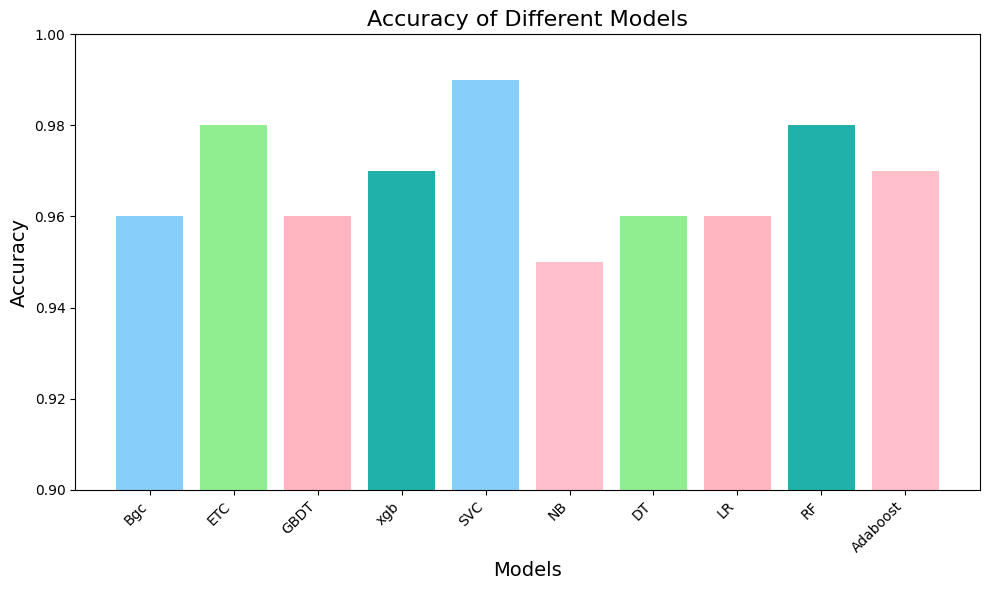

In [42]:
#MODELS 
models = ['Bgc', 'ETC', 'GBDT', 'xgb', 'SVC', 'NB', 'DT', 'LR', 'RF', 'Adaboost']

# Accuracy scores for each model
accuracy_scores = [0.96, 0.98, 0.96, 0.97, 0.99, 0.95, 0.96, 0.96, 0.98, 0.97]
color = ['lightskyblue', 'lightgreen', 'lightpink', 'lightseagreen',
                 'lightskyblue', 'pink', 'lightgreen', 'lightpink', 'lightseagreen', 'pink']
# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=color)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy of Different Models', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylim(0.9, 1)  # Set the y-axis limits for better visualization
plt.tight_layout()
plt.show()



In [43]:
NB1 = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [44]:
NB1.fit(X_train1,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('nb', MultinomialNB())])

In [45]:
emails=[
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'hi, how are you?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!',
    'i won free vacation , you can win click below link',
    "Hey Sarah, are you available for a coffee chat this weekend?",
    "Congratulations! You've been selected as the winner of a $1000 cash prize. Click the link to claim your reward now!"
    'Claim your exclusive discount code now and save 30% on your next purchase! Limited time offer!',
    "You've won a luxury vacation package! Click the link to claim your prize and enjoy a dream getaway!",
    'Get rich quick with our investment opportunity! Join now and start earning big profits!',
    'Hey there, how about catching up for lunch this weekend? It\'s been a while since we last met!',
    'Reminder: Your appointment with the doctor is scheduled for tomorrow at 10 AM. Please remember to bring any necessary documents.',
    'Invitation: Join us for a team-building event this Friday at the local park. Food and games provided!',
    ' you have won 50,000 Rupee cash'

]

In [47]:
NB1.predict(emails)


array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [48]:
SVC1 = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', SVC())
])

# Fit the model
SVC1.fit(X_train1, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('classifier', SVC())])

In [49]:
SVC1.predict(emails)


array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [50]:
import pickle

# Save the model
with open('model4_pickle.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the vectorizer
with open('vectorizer4_pickle.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)


In [55]:
# Example text input to classify
text_input = " This is and "

# Keywords to check for
keywords = ["won", "price", "congratulations"]

# Check if any keyword is in the text input (case-insensitive)
if any(word.lower() in text_input.lower() for word in keywords):
    result = "Spam"
else:
    # Transform the input text using the loaded vectorizer
    text_vectorized = vectorizer.transform([text_input])

    # Predict using the loaded model
    prediction = model.predict(text_vectorized)[0]

    # Classify as Spam or Ham based on the prediction
    if prediction == 1:
        result = "Spam"
    elif prediction == 0:
        result = "Ham"
    else:
        result = "Unknown label"

print(f"The email is classified as: {result}")


The email is classified as: Ham
